# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表


📈 Price Timestamp Info:
起始時間: 2025-07-11 13:00:00
結束時間: 2025-07-26 17:00:00
筆數: 365
價格資料間隔（秒）: 3600.0

📊 APY Timestamp Info:
起始時間: 2024-04-03 23:06:32.849000+00:00
結束時間: 2025-07-26 16:30:17.451000+00:00
筆數: 478
APY 資料間隔（秒）: 7281.842
              timestamp    open    high     low   close  signal
0   2025-07-11 13:00:00  0.3541  0.3562  0.3482  0.3517       0
1   2025-07-11 14:00:00  0.3517  0.3573  0.3490  0.3512       0
2   2025-07-11 15:00:00  0.3511  0.3517  0.3380  0.3411       0
3   2025-07-11 16:00:00  0.3412  0.3458  0.3370  0.3439       0
4   2025-07-11 17:00:00  0.3439  0.3489  0.3432  0.3483       0
..                  ...     ...     ...     ...     ...     ...
360 2025-07-26 13:00:00  0.5755  0.5790  0.5676  0.5698       0
361 2025-07-26 14:00:00  0.5699  0.5742  0.5602  0.5643       0
362 2025-07-26 15:00:00  0.5643  0.5657  0.5542  0.5623       0
363 2025-07-26 16:00:00  0.5622  0.5663  0.5582  0.5654       0
364 2025-07-26 17:00:00  0.5653  0.5657  0.5609  0.5625      -

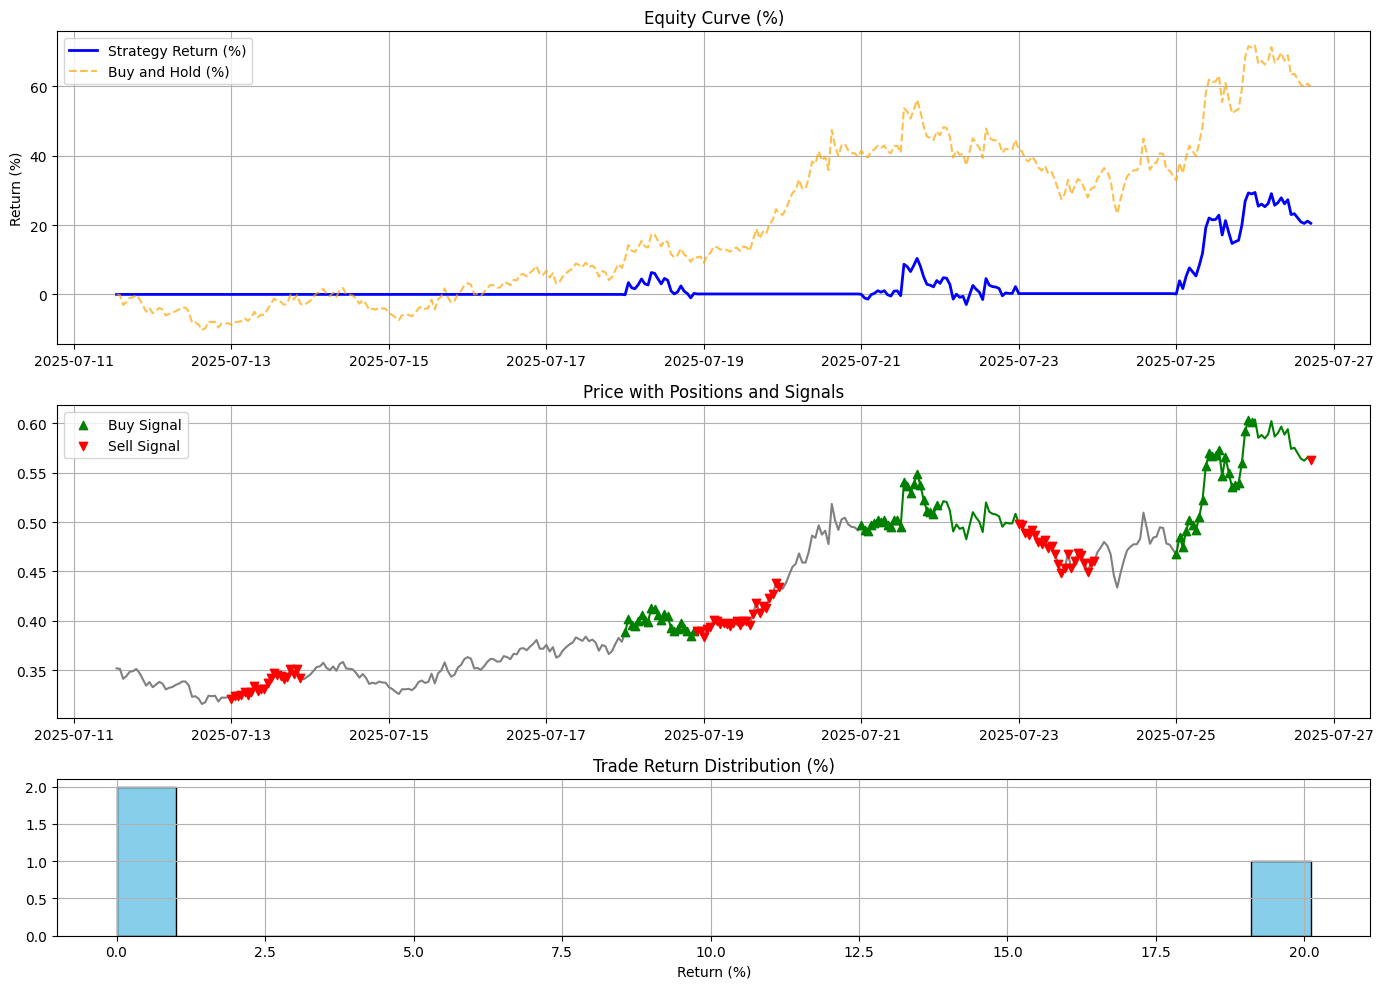

In [10]:
import Technicalindicatorstrategy
from datetime import datetime
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import warnings 
warnings.filterwarnings('ignore')

strategies = [
    "adx","tvl_sma", "boll", "cci", "ema", "kd",
    "macd", "momentum", "rsi", "sma",
    "smartmoney", "williams"
]
strategies = "apy"

strat_module = getattr(Technicalindicatorstrategy, strategies)

df_signals = strat_module.get_signals("ENAUSDT", "1h", datetime.now(),limit=365)
    
# 回測
result = backtest_signals(df_signals, 
                        initial_capital=100, 
                        fee_rate=0.001, 
                        leverage=1, 
                        allow_short=False)

# 繪圖
plot_backtest_result(result)
